In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("PLACEMENT.csv")

In [3]:
df.head()

,CPGA,IQ,PLACEMENT
0,3,56,0
1,3,94,1
2,10,67,0
3,4,50,0
4,9,92,1


In [4]:
df.shape

(43, 3)

In [6]:
df.isnull().sum()

CPGA         0
IQ           0
PLACEMENT    0
dtype: int64

## Steps to be perform
* Preprocessing + EDA + Feature selection
* Extract input and output cols
* Scale the values
* Train test split
* Train the model
* Evaluate the model/model selection
* Deploy the model

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CPGA       43 non-null     int64
 1   IQ         43 non-null     int64
 2   PLACEMENT  43 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


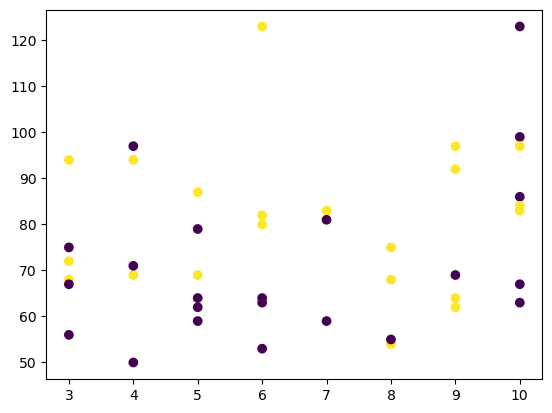

In [11]:
plt.scatter(df["CPGA"],df["IQ"],c=df["PLACEMENT"])

* Extract input and output cols


In [16]:
X = df.drop("PLACEMENT", axis=1)

In [26]:
X.shape

(43, 2)

In [19]:
Y = df['PLACEMENT']

In [25]:
Y.shape

(43,)

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [31]:
x_train

,CPGA,IQ
40,5,62
6,4,94
28,10,97
10,3,72
30,4,71
2,10,67
27,9,62
20,10,99
3,4,50
15,7,59


In [32]:
# Scaling 

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
x_train = scaler.fit_transform(x_train)

In [36]:
x_train

array([[-0.64280863, -0.77412712],
       [-1.06310658,  1.14881878],
       [ 1.45868112,  1.32909496],
       [-1.48340453, -0.17320652],
       [-1.06310658, -0.23329858],
       [ 1.45868112, -0.47366682],
       [ 1.03838317, -0.77412712],
       [ 1.45868112,  1.44927907],
       [-1.06310658, -1.49523183],
       [ 0.19778727, -0.95440329],
       [-0.64280863, -0.653943  ],
       [-0.22251068,  2.8914885 ],
       [-0.64280863, -0.95440329],
       [-0.22251068,  0.42771407],
       [ 0.19778727,  0.36762201],
       [ 0.61808522,  0.00706965],
       [ 0.61808522, -1.25486359],
       [-1.06310658, -0.3534827 ],
       [ 1.03838317, -0.653943  ],
       [-0.22251068, -0.653943  ],
       [ 1.45868112, -0.71403506],
       [ 0.61808522, -1.19477153],
       [-1.06310658,  1.32909496],
       [ 1.45868112,  0.66808231],
       [ 0.61808522, -0.41357476],
       [-1.48340453, -1.13467947],
       [ 1.03838317,  1.32909496],
       [-1.48340453,  0.00706965],
       [-0.64280863,

In [37]:
x_test = scaler.transform(x_test)

In [38]:
x_test

array([[ 1.45868112,  0.48780613],
       [ 1.03838317,  1.02863466],
       [ 1.45868112,  2.8914885 ],
       [-1.48340453, -0.47366682],
       [-0.64280863,  0.24743789],
       [ 1.03838317, -0.3534827 ],
       [-0.64280863, -0.3534827 ],
       [-0.22251068, -0.71403506],
       [-1.48340453, -0.41357476]])

In [39]:
# Model training

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf = LogisticRegression()

In [42]:
clf.fit(x_train, y_train)

LogisticRegression()

* Evaluate the model/model selection


In [44]:
clf.predict(x_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [48]:
y_pred = clf.predict(x_test)

In [47]:
y_test

21    1
4     1
17    0
37    0
41    0
8     0
19    1
13    0
5     1
Name: PLACEMENT, dtype: int64

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,y_pred)

0.5555555555555556

In [53]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

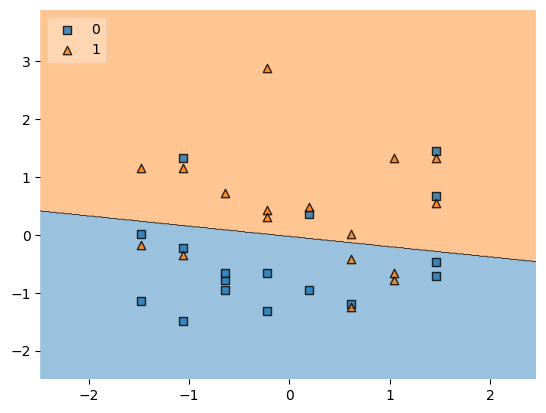

In [57]:
plot_decision_regions(x_train, y_train.values ,clf=clf, legend = 2)

In [58]:
import pickle

In [59]:
pickle.dump(clf,open("Model.pk1","wb"))